**Geometric Brownian motion**

dX (t) = rX (t)dt + σX (t)dW (t)

**Euler-Maruyama method Solution to PDE**

Xn+1 = Xn + ∆trXn + σXn∆Wn


In [75]:
from math import exp, sqrt, log
import numpy as np
from time import time
import scipy as sp
from scipy.stats.mstats import gmean as gm


# Input Parameters
S0 = 100.;  T =1.0; r = 0.05; sigma =0.2

# strike price 
E = 105.;

def Euler_Maruyama(step=50, numsim=100):
    np.random.seed(200000)
    
    # we will vary number of steps in a path and number of simulations
    I = numsim; M = step; dt = T /M; 
    
    # Simulating I Paths with M time steps
    S = np.zeros((M + 1, I))
    S[0] = S0

    for t in range(1, M+1):
        z = np.random.standard_normal(I) * np.sqrt(dt)
        S[t] = S[t-1] + (dt * r * S[t-1]) + (sigma * S[t-1] * (z))
    
    return S

# asian fixed call price (Arthimatic mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)
# stike - strike price for the call

def Asian_Fixed_Call_AM(stockData, strike):
    steps, numsim = stockData.shape
    mean = stockData.mean(axis=0)
    call_value = exp(-r * T) * (sum([max(path - strike, 0) for path in mean]) / numsim )
    return call_value

# asian floating call price (Arthimatic mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)

def Asian_Floating_Call_AM(stockData):
    steps, numsim = stockData.shape
    mean = stockData.mean(axis=0)
    call_value = exp(-r * T) * (sum([max(path, 0) for path in stockData[-1] - mean]) / numsim )
    return call_value

# asian fixed put price (Arthimatic mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)
# stike - strike price for the call
def Asian_Fixed_Put_AM(stockData, strike):
    steps, numsim = stockData.shape
    mean = stockData.mean(axis=0)
    call_value = exp(-r * T) * (sum([max(strike-path, 0) for path in mean]) / numsim )
    return call_value

# asian floating put price (Arthimatic mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)
def Asian_Floating_Put_AM(stockData):
    steps, numsim = stockData.shape
    mean = stockData.mean(axis=0)
    call_value = exp(-r * T) * (sum([max(path, 0) for path in mean - stockData[-1] ]) / numsim )
    return call_value

# asian fixed call price (Geometric mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)
# stike - strike price for the call
def Asian_Fixed_Call_GM(stockData, strike):
    steps, numsim = stockData.shape
    mean = gm(stockData, axis=0)
    call_value = exp(-r * T) * (sum([max(path - strike, 0) for path in mean]) / numsim )
    return call_value


# asian floating call price (Geometric mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)
def Asian_Floating_Call_GM(stockData):
    steps, numsim = stockData.shape
    mean = gm(stockData, axis=0)
    call_value = exp(-r * T) * (sum([max(path, 0) for path in stockData[-1] - mean]) / numsim )
    return call_value

# asian fixed put price (Geometric mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)
# stike - strike price for the call
def Asian_Fixed_Put_GM(stockData, strike):
    steps, numsim = stockData.shape
    mean = gm(stockData, axis=0)
    call_value = exp(-r * T) * (sum([max(strike-path, 0) for path in mean]) / numsim )
    return call_value

# asian floating put price (Geometric mean)
# ******** parameters **********
# stockData - a 2d array (rows representing steps and columns representing simulation. 1 vector along column in stock path)
def Asian_Floating_Put_GM(stockData):
    steps, numsim = stockData.shape
    mean = gm(stockData, axis=0)
    call_value = exp(-r * T) * (sum([max(path, 0) for path in mean - stockData[-1] ]) / numsim )
    return call_value




lets simulate some paths and plot them

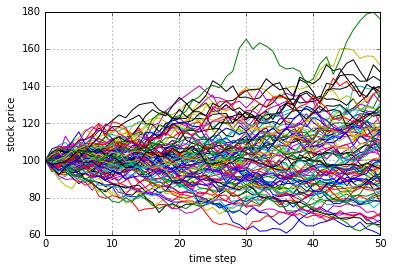

In [71]:
stockData = Euler_Maruyama()

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(stockData)
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('stock price')

histogram for checking out distribution

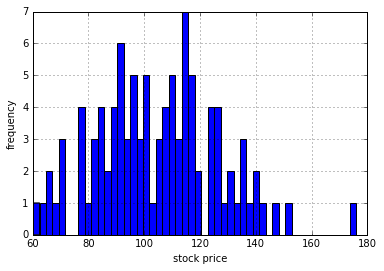

In [72]:
plt.hist(stockData[-1], bins=50)
plt.grid(True)
plt.xlabel('stock price')
plt.ylabel('frequency')

Fixed **step to 100** and increase number of simulation (1000, 5000, 10000, 20000, 50000)
Both AM and GM will be calculated

In [111]:
options_price_fixed_call_am_100 = [Asian_Fixed_Call_AM(Euler_Maruyama(100, 1000), E), 
                               Asian_Fixed_Call_AM(Euler_Maruyama(100, 5000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(100, 10000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(100, 20000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(100, 50000), E)]
options_price_fixed_call_am_100

[3.5170280453107061,
 3.5837648360311061,
 3.5357541686228067,
 3.5348758607235919,
 3.5046486384634163]

In [112]:
options_price_floating_call_am_100 = [Asian_Floating_Call_AM(Euler_Maruyama(100, 1000)), 
                               Asian_Floating_Call_AM(Euler_Maruyama(100, 5000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(100, 10000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(100, 20000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(100, 50000))]
options_price_floating_call_am_100

[6.0104593036500944,
 6.0189396370663948,
 5.9170239974011283,
 5.8451255231080399,
 5.8314525973532092]

In [113]:
options_price_fixed_put_am_100 = [Asian_Fixed_Put_AM(Euler_Maruyama(100, 1000), E), 
                               Asian_Fixed_Put_AM(Euler_Maruyama(100, 5000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(100, 10000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(100, 20000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(100, 50000), E)]
options_price_fixed_put_am_100

[6.0884696810450034,
 5.8592920457560513,
 5.7960905628374331,
 5.8265849100321709,
 5.856975938245947]

In [114]:
options_price_floating_put_am_100 = [Asian_Floating_Put_AM(Euler_Maruyama(100, 1000)), 
                               Asian_Floating_Put_AM(Euler_Maruyama(100, 5000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(100, 10000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(100, 20000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(100, 50000))]
options_price_floating_put_am_100

[3.389006948511311,
 3.3192967716917359,
 3.4333750546671746,
 3.4530541987369805,
 3.4023869393178705]

In [115]:
options_price_fixed_call_gm_100 = [Asian_Fixed_Call_GM(Euler_Maruyama(100, 1000), E), 
                               Asian_Fixed_Call_GM(Euler_Maruyama(100, 5000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(100, 10000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(100, 20000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(100, 50000), E)]
options_price_fixed_call_gm_100

[3.3222438060116595,
 3.3988844670904674,
 3.3488983732775197,
 3.3480554148959918,
 3.3210122679847984]

In [116]:
options_price_floating_call_gm_100 = [Asian_Floating_Call_GM(Euler_Maruyama(100, 1000)), 
                               Asian_Floating_Call_GM(Euler_Maruyama(100, 5000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(100, 10000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(100, 20000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(100, 50000))]
options_price_floating_call_gm_100

[6.2306301463177887,
 6.2317373686295499,
 6.1288145517319093,
 6.0572107933329979,
 6.0416195258197938]

In [117]:
options_price_fixed_put_gm_100 = [Asian_Fixed_Put_GM(Euler_Maruyama(100, 1000), E), 
                               Asian_Fixed_Put_GM(Euler_Maruyama(100, 5000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(100, 10000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(100, 20000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(100, 50000), E)]
options_price_fixed_put_gm_100

[6.2543609163727538,
 6.0117133416993243,
 5.9484408971349421,
 5.9825047093354993,
 6.0111298444863683]

In [118]:
options_price_floating_put_gm_100 = [Asian_Floating_Put_GM(Euler_Maruyama(100, 1000)), 
                               Asian_Floating_Put_GM(Euler_Maruyama(100, 5000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(100, 10000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(100, 20000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(100, 50000))]
options_price_floating_put_gm_100

[3.2485023165522167,
 3.194792838370986,
 3.3059594793551645,
 3.3223992238310118,
 3.2747635910654878]

Fixed step to **500** and increase number of simulation (1000, 5000, 10000, 20000, 50000) 
Both AM and GM will be calculated

In [119]:
options_price_fixed_call_am_500 = [Asian_Fixed_Call_AM(Euler_Maruyama(500, 1000), E), 
                               Asian_Fixed_Call_AM(Euler_Maruyama(500, 5000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(500, 10000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(500, 20000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(500, 50000), E)]
options_price_fixed_call_am_500

[3.5462212345103552,
 3.520626107171041,
 3.4901777710122097,
 3.5037069550764151,
 3.5439138614759114]

In [120]:
options_price_floating_call_am_500 = [Asian_Floating_Call_AM(Euler_Maruyama(500, 1000)), 
                               Asian_Floating_Call_AM(Euler_Maruyama(500, 5000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(500, 10000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(500, 20000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(500, 50000))]
options_price_floating_call_am_500

[5.9120053017866638,
 5.7615905611051108,
 5.8672500861303458,
 5.9143207063840508,
 5.8618822474300698]

In [121]:
options_price_fixed_put_am_500 = [Asian_Fixed_Put_AM(Euler_Maruyama(500, 1000), E), 
                               Asian_Fixed_Put_AM(Euler_Maruyama(500, 5000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(500, 10000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(500, 20000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(500, 50000), E)]
options_price_fixed_put_am_500

[5.7944740089165139,
 5.806800553492244,
 5.8690700950497527,
 5.8852106790488419,
 5.8758394449462177]

In [122]:
options_price_floating_put_am_500 = [Asian_Floating_Put_AM(Euler_Maruyama(500, 1000)), 
                               Asian_Floating_Put_AM(Euler_Maruyama(500, 5000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(500, 10000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(500, 20000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(500, 50000))]
options_price_floating_put_am_500

[3.0671375290180309,
 3.4467693022987613,
 3.4681480649876617,
 3.3670380629792693,
 3.398022325514602]

In [123]:
options_price_fixed_call_gm_500 = [Asian_Fixed_Call_GM(Euler_Maruyama(500, 1000), E), 
                               Asian_Fixed_Call_GM(Euler_Maruyama(500, 5000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(500, 10000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(500, 20000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(500, 50000), E)]
options_price_fixed_call_gm_500

[3.3645189175126222,
 3.336177373487291,
 3.3092783867056124,
 3.3218173386310021,
 3.3603973249410388]

In [124]:
options_price_floating_call_gm_500 = [Asian_Floating_Call_GM(Euler_Maruyama(500, 1000)), 
                               Asian_Floating_Call_GM(Euler_Maruyama(500, 5000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(500, 10000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(500, 20000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(500, 50000))]
options_price_floating_call_gm_500

[6.1227524073473942,
 5.9714326165795262,
 6.073536867924588,
 6.1232970966715659,
 6.0717917763408771]

In [125]:
options_price_fixed_put_gm_500 = [Asian_Fixed_Put_GM(Euler_Maruyama(500, 1000), E), 
                               Asian_Fixed_Put_GM(Euler_Maruyama(500, 5000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(500, 10000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(500, 20000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(500, 50000), E)]
options_price_fixed_put_gm_500

[5.9338600891851527,
 5.9609932432584296,
 6.0214081266137436,
 6.0384671639157199,
 6.0283897259428132]

In [126]:
options_price_floating_put_gm_500 = [Asian_Floating_Put_GM(Euler_Maruyama(500, 1000)), 
                               Asian_Floating_Put_GM(Euler_Maruyama(500, 5000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(500, 10000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(500, 20000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(500, 50000))]
options_price_floating_put_gm_500

[2.9567962373123948,
 3.3179699343232167,
 3.3411974309113401,
 3.2408683519545254,
 3.2718650368939741]

Fixed **step to 1000** and increase number of simulation (1000, 5000, 10000, 20000, 50000)
Both AM and GM will be calculated

In [127]:
options_price_fixed_call_am_1000 = [Asian_Fixed_Call_AM(Euler_Maruyama(1000, 1000), E), 
                               Asian_Fixed_Call_AM(Euler_Maruyama(1000, 5000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(1000, 10000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(1000, 20000), E),
                              Asian_Fixed_Call_AM(Euler_Maruyama(1000, 50000), E)]
options_price_fixed_call_am_1000

[3.5950678345319651,
 3.4950799667939623,
 3.5006478470356197,
 3.4997197407039096,
 3.5393965551140241]

In [128]:
options_price_floating_call_am_1000 = [Asian_Floating_Call_AM(Euler_Maruyama(1000, 1000)), 
                               Asian_Floating_Call_AM(Euler_Maruyama(1000, 5000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(1000, 10000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(1000, 20000)),
                              Asian_Floating_Call_AM(Euler_Maruyama(1000, 50000))]
options_price_floating_call_am_1000

[5.8083228042215431,
 5.8144397545999418,
 5.9518451078827042,
 5.826876968928171,
 5.8473968492949675]

In [129]:
options_price_fixed_put_am_1000 = [Asian_Fixed_Put_AM(Euler_Maruyama(1000, 1000), E), 
                               Asian_Fixed_Put_AM(Euler_Maruyama(1000, 5000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(1000, 10000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(1000, 20000), E),
                              Asian_Fixed_Put_AM(Euler_Maruyama(1000, 50000), E)]
options_price_fixed_put_am_1000

[5.7189328952830794,
 5.8861286412696101,
 5.8967175746785978,
 5.8629077309482671,
 5.8842509385980346]

In [130]:
options_price_floating_put_am_1000 = [Asian_Floating_Put_AM(Euler_Maruyama(1000, 1000)), 
                               Asian_Floating_Put_AM(Euler_Maruyama(1000, 5000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(1000, 10000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(1000, 20000)),
                              Asian_Floating_Put_AM(Euler_Maruyama(1000, 50000))]
options_price_floating_put_am_1000

[3.3212485956821571,
 3.4322049779005539,
 3.3672188246138566,
 3.3497710183097067,
 3.4284032249592311]

In [131]:
options_price_fixed_call_gm_1000 = [Asian_Fixed_Call_GM(Euler_Maruyama(1000, 1000), E), 
                               Asian_Fixed_Call_GM(Euler_Maruyama(1000, 5000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(1000, 10000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(1000, 20000), E),
                              Asian_Fixed_Call_GM(Euler_Maruyama(1000, 50000), E)]
options_price_fixed_call_gm_1000

[3.4153788924964088,
 3.3160730860202103,
 3.3177474504399838,
 3.3195829030441932,
 3.3558435969323037]

In [132]:
options_price_floating_call_gm_1000 = [Asian_Floating_Call_GM(Euler_Maruyama(1000, 1000)), 
                               Asian_Floating_Call_GM(Euler_Maruyama(1000, 5000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(1000, 10000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(1000, 20000)),
                              Asian_Floating_Call_GM(Euler_Maruyama(1000, 50000))]
options_price_floating_call_gm_1000

[6.0193078565542839,
 6.0199889225060188,
 6.1638051833115499,
 6.0343173818996263,
 6.0557959480984982]

In [133]:
options_price_fixed_put_gm_1000 = [Asian_Fixed_Put_GM(Euler_Maruyama(1000, 1000), E), 
                               Asian_Fixed_Put_GM(Euler_Maruyama(1000, 5000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(1000, 10000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(1000, 20000), E),
                              Asian_Fixed_Put_GM(Euler_Maruyama(1000, 50000), E)]
options_price_fixed_put_gm_1000

[5.8631905212431139,
 6.0391248333581498,
 6.0509064713765843,
 6.0140514888664764,
 6.0376194938797418]

In [134]:
options_price_floating_put_gm_1000 = [Asian_Floating_Put_GM(Euler_Maruyama(1000, 1000)), 
                               Asian_Floating_Put_GM(Euler_Maruyama(1000, 5000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(1000, 10000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(1000, 20000)),
                              Asian_Floating_Put_GM(Euler_Maruyama(1000, 50000))]
options_price_floating_put_gm_1000

[3.2082870800193111,
 3.3057510729443469,
 3.2420896067490856,
 3.2259308357032874,
 3.2998808102993062]

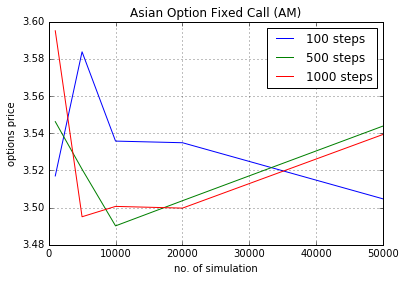

In [140]:
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_call_am_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_call_am_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_call_am_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Fixed Call (AM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='upper right')

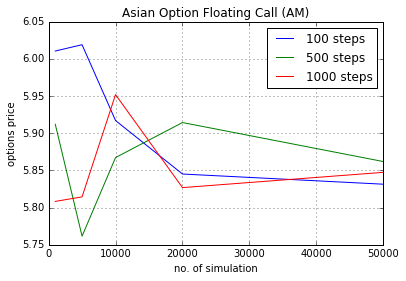

In [141]:
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_call_am_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_call_am_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_call_am_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Floating Call (AM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='upper right')

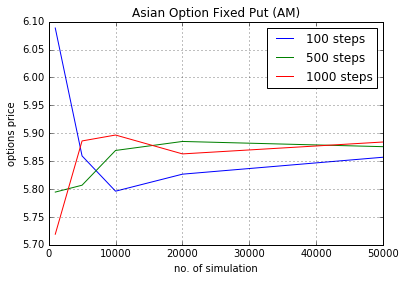

In [142]:

plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_put_am_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_put_am_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_put_am_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Fixed Put (AM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='upper right')

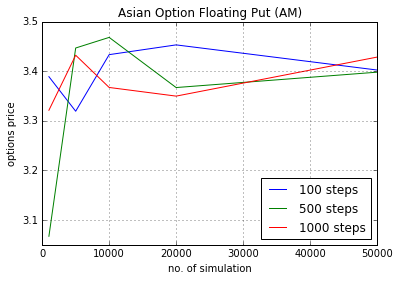

In [144]:
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_put_am_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_put_am_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_put_am_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Floating Put (AM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='lower right')

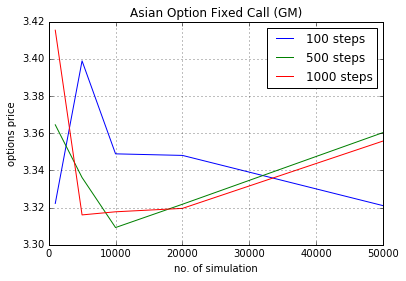

In [145]:
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_call_gm_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_call_gm_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_call_gm_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Fixed Call (GM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='upper right')


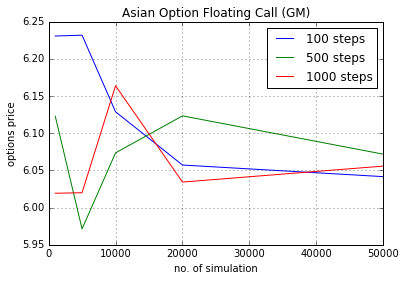

In [146]:
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_call_gm_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_call_gm_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_call_gm_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Floating Call (GM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='upper right')

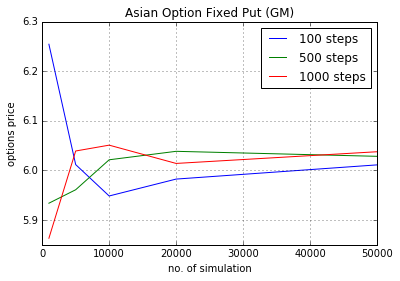

In [147]:
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_put_gm_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_put_gm_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_fixed_put_gm_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Fixed Put (GM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='upper right')

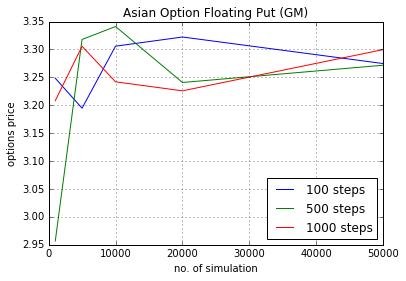

In [149]:
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_put_gm_100)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_put_gm_500)
plt.plot([1000, 5000, 10000, 20000, 50000], options_price_floating_put_gm_1000)
plt.grid(True)
plt.xlabel('no. of simulation')
plt.ylabel('options price')
plt.title('Asian Option Floating Put (GM)')
plt.legend(['100 steps', '500 steps', '1000 steps'], loc='lower right')